<a href="https://colab.research.google.com/github/neeraja-04/CURVETOPIA/blob/main/Curvetopia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Identify the regular shapes and label them**

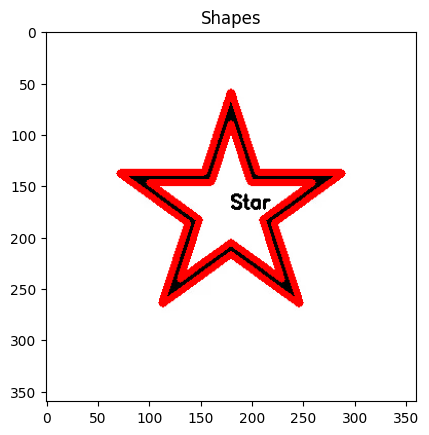

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading image
img = cv2.imread('star.jpg')

# Converting image into grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Setting threshold of gray image
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Using a findContours() function
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

i = 0

# List for storing names of shapes
for contour in contours:

    # Ignoring the first contour as it detects the whole image as a shape
    if i == 0:
        i = 1
        continue

    # Approximate the shape using cv2.approxPolyDP() function
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)

    # Draw contours
    cv2.drawContours(img, [contour], 0, (0, 0, 255), 5)

    # Finding center point of shape
    M = cv2.moments(contour)
    if M['m00'] != 0.0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])

    # Putting shape name at the center of each shape
    if len(approx) == 3:
        cv2.putText(img, 'Triangle', (cx, cy),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

    elif len(approx) == 4:
        # Compute the bounding box
        x, y, w, h = cv2.boundingRect(approx)

        # Aspect ratio of the bounding box
        aspectRatio = float(w) / h

        # Determine if it's a square or a rectangle
        if 0.95 <= aspectRatio <= 1.05:  # Allowing some margin of error
            cv2.putText(img, 'Square', (x + w // 2, y + h // 2),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
        else:
            cv2.putText(img, 'Rectangle', (x + w // 2, y + h // 2),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

    elif len(approx) == 5:
        cv2.putText(img, 'Pentagon', (cx, cy),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

    elif len(approx) == 6:
        cv2.putText(img, 'Hexagon', (cx, cy),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

    elif len(approx) == 7:
        cv2.putText(img, 'Heptagon', (cx, cy),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

    elif len(approx) == 8:
        cv2.putText(img, 'Octagon', (cx, cy),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

    elif len(approx) == 9:
        cv2.putText(img, 'Nonagon', (cx, cy),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

    elif len(approx) == 10:
        # Check if the shape is convex or concave
        if cv2.isContourConvex(approx):
            cv2.putText(img, 'Decagon', (cx, cy),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
        else:
            cv2.putText(img, 'Star', (cx, cy),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

    else:
        # Calculate circularity
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        if perimeter == 0:
            continue  # avoid division by zero

        circularity = 4 * np.pi * (area / (perimeter ** 2))

        # Check if the shape is a circle based on circularity and number of vertices
        if 0.89 <= circularity <= 1 and len(approx) > 6:
            cv2.putText(img, 'Circle', (cx, cy),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)
        else:
            cv2.putText(img, 'Other', (cx, cy),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

# Display the image with matplotlib
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Shapes')
plt.show()

**Mark the different kind of symmetries (horizontal, vertical, diagonal) to the regular shapes if exists**

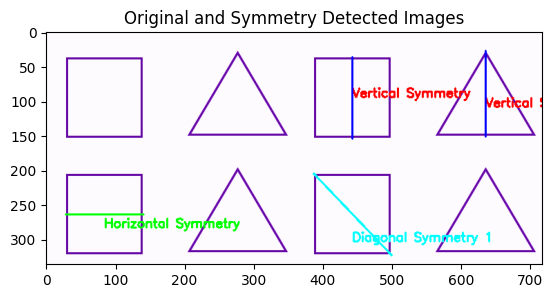

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def detect_symmetry(image, contours):
    vertical_img = image.copy()
    horizontal_img = image.copy()
    diagonal1_img = image.copy()
    diagonal2_img = image.copy()

    for contour in contours:
        if len(contour) < 5:
            continue

        M = cv2.moments(contour)
        if M['m00'] == 0:
            continue

        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])

        x, y, w, h = cv2.boundingRect(contour)
        center_x = x + w // 2
        center_y = y + h // 2

        mask = np.zeros_like(gray)
        cv2.drawContours(mask, [contour], -1, 255, -1)

        def check_symmetry(mask, flip_func):
            sub_mask = mask[y:y+h, x:x+w]
            flipped_mask = flip_func(sub_mask)
            if flipped_mask.shape != sub_mask.shape:
                flipped_mask = cv2.resize(flipped_mask, (sub_mask.shape[1], sub_mask.shape[0]))
            similarity = np.sum(sub_mask == flipped_mask) / (w * h)
            return similarity

        vertical_similarity = check_symmetry(mask, np.fliplr)
        horizontal_similarity = check_symmetry(mask, np.flipud)
        diagonal_similarity_1 = check_symmetry(mask, lambda m: np.transpose(m))
        diagonal_similarity_2 = check_symmetry(mask, lambda m: np.transpose(np.fliplr(m)))

        threshold = 0.75

        if vertical_similarity > threshold:
            cv2.putText(vertical_img, 'Vertical Symmetry', (cx, cy),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
            cv2.line(vertical_img, (center_x, y), (center_x, y + h), (255, 0, 0), 2)

        if horizontal_similarity > threshold:
            cv2.putText(horizontal_img, 'Horizontal Symmetry', (cx, cy + 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
            cv2.line(horizontal_img, (x, center_y), (x + w, center_y), (0, 255, 0), 2)

        if diagonal_similarity_1 > threshold:
            cv2.putText(diagonal1_img, 'Diagonal Symmetry 1', (cx, cy + 40),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
            cv2.line(diagonal1_img, (x, y), (x + w, y + h), (255, 255, 0), 2)

        if diagonal_similarity_2 > threshold:
            cv2.putText(diagonal2_img, 'Diagonal Symmetry 2', (cx, cy + 60),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)
            cv2.line(diagonal2_img, (x, y + h), (x + w, y), (0, 255, 255), 2)

    return vertical_img, horizontal_img, diagonal1_img, diagonal2_img

img = cv2.imread('sample1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, threshold = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshold, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

vertical_img, horizontal_img, diagonal1_img, diagonal2_img = detect_symmetry(img, contours)

# Create a composite image
composite_img = np.zeros((img.shape[0] * 2, img.shape[1] * 2, 3), dtype=np.uint8)
composite_img[:img.shape[0], :img.shape[1]] = img
composite_img[:img.shape[0], img.shape[1]:] = vertical_img
composite_img[img.shape[0]:, :img.shape[1]] = horizontal_img
composite_img[img.shape[0]:, img.shape[1]:] = diagonal1_img

# Display the composite image
plt.imshow(cv2.cvtColor(composite_img, cv2.COLOR_BGR2RGB))
plt.title('Original and Symmetry Detected Images')
plt.show()